In [1]:
import numpy as np

In [2]:
def compute_cost(X: np.ndarray, y: np.ndarray, theta: np.ndarray):
    # Initialize some useful values
    m = y.size
    cost = 0

    # ===================== Your Code Here =====================
    # Instructions : Compute the cost of a particular choice of theta.
    #                You should set the variable "cost" to the correct value.
    
    cost = np.sum((np.dot(X, theta) - y) ** 2 / (2 * m))
    # ==========================================================

    return cost

In [3]:
def feature_normalize(X: np.ndarray):
    # You need to set these values correctly
    n = X.shape[1]  # the number of features
    X_norm = X
    mu = np.zeros(n)
    sigma = np.zeros(n)
    
    # ===================== Your Code Here =====================
    # Instructions : First, for each feature dimension, compute the mean
    #                of the feature and subtract it from the dataset,
    #                storing the mean value in mu. Next, compute the
    #                standard deviation of each feature and divide
    #                each feature by its standard deviation, storing
    #                the standard deviation in sigma
    #
    #                Note that X is a 2D array where each column is a
    #                feature and each row is an example. You need
    #                to perform the normalization separately for
    #                each feature.
    #
    # Hint: You might find the 'np.mean' and 'np.std' functions useful.
    #       To get the same result as Octave 'std', use np.std(X, 0, ddof=1)
    #

    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    X_norm = (X_norm - mu) / sigma
    # ===========================================================

    return X_norm, mu, sigma

In [4]:
def gradient_descent(X: np.ndarray, y: np.ndarray, theta: np.ndarray, alpha, num_iters):
    # Initialize some useful values
    m = y.size
    J_history = np.zeros(num_iters)

    for i in range(0, num_iters):
        # ===================== Your Code Here =====================
        # Instructions : Perform a single gradient step on the parameter vector theta
        #
        # Hint: X.shape = (97, 2), y.shape = (97, ), theta.shape = (2, )
        error = np.dot(X, theta) - y       
        sum_error = np.sum(X * error, axis = 0)
        sum_error = sum_error.reshape((sum_error.shape[0], 1))
        theta -= (alpha / m) * sum_error
        # ===========================================================
        # Save the cost every iteration
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

In [48]:
def gradient_descent_multi(X, y, theta, alpha, num_iters):
    # Initialize some useful values
    m = y.size
    J_history = np.zeros(num_iters)

    for i in range(0, num_iters):
        # ===================== Your Code Here =====================
        # Instructions : Perform a single gradient step on the parameter vector theta
        #
        error = np.dot(X, theta) - y       
        sum_error = np.sum(X * error, axis = 0)
        sum_error = sum_error.reshape((sum_error.shape[0], 1))
        theta -= (alpha / m) * sum_error
        # ===========================================================
        # Save the cost every iteration
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

In [6]:
def normal_eqn(X: np.ndarray, y: np.ndarray):
    theta = np.zeros((X.shape[1], 1))

    # ===================== Your Code Here =====================
    # Instructions : Complete the code to compute the closed form solution
    #                to linear regression and put the result in theta
    #
    X_T = np.transpose(X)
    theta = np.dot(np.dot(np.linalg.pinv(np.dot(X_T, X)), X_T), y)

    return theta

In [7]:
import matplotlib.pyplot as plt


def plot_data(X, y):
    # ===================== Your Code Here =====================
    # Instructions : Plot the training data into a figure using the matplotlib.pyplot
    #                using the "plt.scatter" function. Set the axis labels using
    #                "plt.xlabel" and "plt.ylabel". Assume the population and revenue data
    #                have been passed in as the x and y.

    # Hint : You can use the 'marker' parameter in the "plt.scatter" function to change the marker type (e.g. "x", "o").
    #        Furthermore, you can change the color of markers with 'c' parameter.

    plt.scatter(X, y, marker='+')
    plt.xlabel('x')
    plt.ylabel('y')
    # ===========================================================

    plt.show()

In [8]:
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import axes3d, Axes3D

# 1. Linear Regression

## 1.1 Plotting

In [9]:
data = np.loadtxt('/content/drive/MyDrive/Coursera_ML/Exer_1/ex1data1.txt', delimiter=',')

In [10]:
X = data[:, :-1]
y = data[:, -1:]
m = y.size

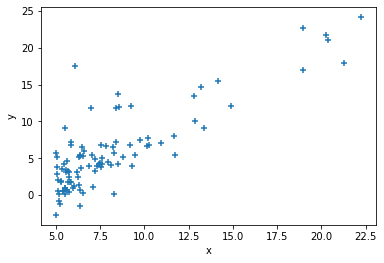

In [11]:
plot_data(X, y)

## 1.2 Cost and Gradient descent

In [12]:
X = np.c_[np.ones((m, 1)), X]
theta = np.zeros((2, 1))

In [13]:
# Some gradient descent settings
iteration = 1500
alpha = 0.01

In [14]:
# compute and display initial cost
compute_cost(X, y, theta)

32.072733877455676

In [15]:
# further testing of the cost function
compute_cost(X, y, np.array([[-1], [2]]))

54.24245508201237

In [16]:
# run gradient descent
theta, J_history = gradient_descent(X, y, theta, alpha, iteration) 

In [17]:
theta

array([[-3.63029144],
       [ 1.16636235]])

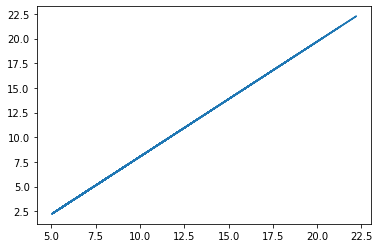

In [18]:
plt.plot(X[:, 1], np.dot(X, theta), label='Linear regression')

In [23]:
predict1 = np.dot(np.array([1, 3.5]), theta)
print('For population = 35,000, we predict a profit of {:0.3f}'.format(predict1[0] * 10000))

For population = 35,000, we predict a profit of 4519.768


In [24]:
predict2 = np.dot(np.array([1, 7]), theta)
print('For population = 70,000, we predict a profit of {:0.3f}'.format(predict2[0] * 10000))

For population = 70,000, we predict a profit of 45342.450


## 1.3 Visualizing J(theta_0, theta_1)

In [25]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

In [31]:
# initialize J_vals to a matrix of 0's
xs, ys = np.meshgrid(theta0_vals, theta1_vals)
J_vals = np.zeros(xs.shape)

In [33]:
# Fill out J_vals
for i in range(theta0_vals.size):
    for j in range(theta1_vals.size):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i][j] = compute_cost(X, y, t)

In [34]:
J_vals = np.transpose(J_vals)

Text(0.5, 0, '$\\theta_1$')

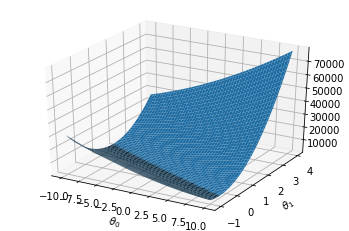

In [35]:
fig1 = plt.figure(1)
ax = fig1.gca(projection='3d')
ax.plot_surface(xs, ys, J_vals)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: No contour levels were found within the data range.
  This is separate from the ipykernel package so we can avoid doing imports until


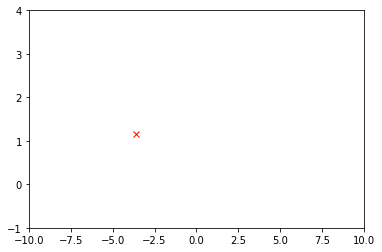

In [36]:
plt.figure(2)
lvls = np.logspace(-2, 3, 20)
plt.contour(xs, ys, J_vals, levels=lvls, norm=LogNorm())
plt.plot(theta[0], theta[1], c='r', marker="x")

# 2. Linear regression with multiple variables

## 2.1 Feature Normalization

In [39]:
data = np.loadtxt('/content/drive/MyDrive/Coursera_ML/Exer_1/ex1data2.txt', delimiter=',', dtype=np.int64)

In [41]:
# Load Data
X = data[:, :-1]
y = data[:, -1:]
m = y.size

In [42]:
# Print out some data points
print('First 10 examples from the dataset:')
for i in range(10):
    print('x = {}, y = {}'.format(X[i], y[i]))

First 10 examples from the dataset:
x = [2104    3], y = [399900]
x = [1600    3], y = [329900]
x = [2400    3], y = [369000]
x = [1416    2], y = [232000]
x = [3000    4], y = [539900]
x = [1985    4], y = [299900]
x = [1534    3], y = [314900]
x = [1427    3], y = [198999]
x = [1380    3], y = [212000]
x = [1494    3], y = [242500]


In [43]:
# Scale features and set them to zero mean
X, mu, sigma = feature_normalize(X)

In [44]:
# Add intercept term to X
X = np.c_[np.ones((m, 1)), X]

## 2.2 Gradient Descent

In [46]:
# Choose some alpha value
alpha = 0.01
num_iters = 400

In [49]:
# Init Theta and Run Gradient Descent
theta = np.zeros((3, 1))
theta, J_history = gradient_descent_multi(X, y, theta, alpha, num_iters)

Text(0, 0.5, 'Cost J')

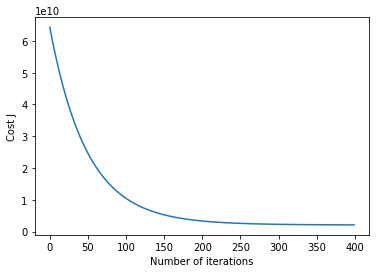

In [50]:
# Plot the convergence graph
plt.figure()
plt.plot(np.arange(num_iters), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

In [52]:
# Display gradient descent's result
print('Theta computed from gradient descent: \n{}'.format(theta))

Theta computed from gradient descent: 
[[334302.06399328]
 [100087.11600585]
 [  3673.54845093]]


In [60]:
# Estimate the price of a 1650 sq-ft, 3 br house
price = 0
predict = np.array([1650, 3])
predict = (predict - mu) / sigma
predict = np.r_[np.r_[np.array([1]), predict]]
price = np.dot(predict, theta)
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): {:0.3f}'.format(price[0]))

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): 289314.620


## 2.3 Normal Equations

In [61]:
# Load Data
X = data[:, :-1]
y = data[:, -1:]
m = y.size

In [62]:
# Add intercept term to X
X = np.c_[np.ones((m, 1)), X]

In [63]:
# Calculate the parameters from the normal equation
theta = normal_eqn(X, y)

In [64]:
# Display normal equation's result
print('Theta computed from the normal equations: {}'.format(theta))

Theta computed from the normal equations: [[89597.90954355]
 [  139.21067402]
 [-8738.01911255]]


In [66]:
# Estimate the price of a 1650 sq-ft, 3 br house
price = 0
predict = np.array([1, 1650, 3])
price = np.dot(predict, theta)
print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): {:0.3f}'.format(price[0]))

Predicted price of a 1650 sq-ft, 3 br house (using normal equations): 293081.464
